In [1]:
import tensorflow as tf
from PIL import Image 
import numpy as np
import skimage
import skimage.io
import skimage.transform
from matplotlib.pyplot import imshow
%matplotlib inline  

/home/pranay360/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
synset = [l.strip() for l in open('Dataset/synset.txt').readlines()]

def load_image(path):
    img = skimage.io.imread(path)
    imshow(Image.open(path,'r'))
    img = img / 255.0
    assert (0 <= img).all() and (img <= 1.0).all()
    #crop image from center
    short_edge = min(img.shape[:2])
    yy = int((img.shape[0] - short_edge) / 2)
    xx = int((img.shape[1] - short_edge) / 2)
    crop_img = img[yy : yy + short_edge, xx : xx + short_edge]
    resized_img = skimage.transform.resize(crop_img, (299, 299))
    return resized_img

def print_prob(prob):
    pred = np.argsort(prob)[::-1]
    top1 = synset[pred[0]-1]
    print "Top Prediction", top1
    top5 = [synset[pred[i]-1] for i in range(5)]
    print "Top 5 Prediction: ", top5


In [3]:
with open('CNNs/inception_v4.pb', 'rb') as f:
    fileContent = f.read()

graph_def = tf.GraphDef()
graph_def.ParseFromString(fileContent)
tf.import_graph_def(graph_def)
graph = tf.get_default_graph()
tensors = [n.name for n in tf.get_default_graph().as_graph_def().node]
print "graph loaded from disk"

graph loaded from disk


In [8]:
batch_size=1
def forward_pass(path):
    image = load_image(path)
    #image=np.append(image, load_image("Images/cat.jpg"),axis=0)

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        batch = image.reshape((batch_size, 299, 299, 3))
        assert batch.shape == (batch_size, 299, 299, 3)
        feed_dict = {graph.get_tensor_by_name("import/InputImage:0"): batch}
        prob_tensor = graph.get_tensor_by_name("import/InceptionV4/Logits/AvgPool_1a/AvgPool:0")
        prob = sess.run(prob_tensor, feed_dict=feed_dict)
        
    print prob[0][0]

[[ 0.05520491  0.26986542  0.08130351 ...,  0.52135807  0.06931944
   0.1312103 ]]


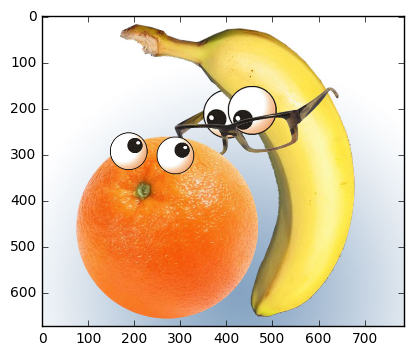

In [9]:
forward_pass("Images/banor.jpg")

In [9]:
for ten in tensors[::-1][:100]:
    print ten, graph.get_tensor_by_name(ten+":0").get_shape()

import/InceptionV4/Logits/Predictions (?, 1001)
import/InceptionV4/Logits/Logits/BiasAdd (?, 1001)
import/InceptionV4/Logits/Logits/biases/read (1001,)
import/InceptionV4/Logits/Logits/biases (1001,)
import/InceptionV4/Logits/Logits/MatMul (?, 1001)
import/InceptionV4/Logits/Logits/weights/read (1536, 1001)
import/InceptionV4/Logits/Logits/weights (1536, 1001)
import/InceptionV4/Logits/PreLogitsFlatten/Reshape (?, 1536)
import/InceptionV4/Logits/PreLogitsFlatten/Reshape/shape (2,)
import/InceptionV4/Logits/AvgPool_1a/AvgPool (?, ?, ?, 1536)
import/InceptionV4/InceptionV4/Mixed_7d/concat (?, ?, ?, 1536)
import/InceptionV4/InceptionV4/Mixed_7d/concat/concat_dim ()
import/InceptionV4/InceptionV4/Mixed_7d/Branch_3/Conv2d_0b_1x1/Relu (?, ?, ?, 256)
import/InceptionV4/InceptionV4/Mixed_7d/Branch_3/Conv2d_0b_1x1/BatchNorm/batchnorm/add_1 (?, ?, ?, 256)
import/InceptionV4/InceptionV4/Mixed_7d/Branch_3/Conv2d_0b_1x1/BatchNorm/batchnorm/sub (256,)
import/InceptionV4/InceptionV4/Mixed_7d/Branch_3